In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [36]:
df = pd.read_csv("C:\\Users\\sunny\\Desktop\\To upload\\uber.csv")#reading Csv file
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [37]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [38]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [39]:
df.drop(['Unnamed: 0','key'],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [40]:
def haversine(lon_1,lon_2,lat_1,lat_2):
    lon_1,lon_2,lat_1,lat_2=map(np.radians,[lon_1,lon_2,lat_1,lat_2])
    diff_lon=lon_2-lon_1
    diff_lat=lat_2-lat_1
    distance=2*6371*np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2+np.cos(lat_1)*np.cos(lat_2)*np.cos(lat_2)*np.sin(diff_lon/2.0)**2))
    return distance

df['Distance']=haversine(df['pickup_longitude'],df['dropoff_longitude'],df['pickup_latitude'],df['dropoff_latitude'])
df['Distance']=df['Distance'].astype(float).round(2)
df.head()

C:\Users\sunny\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,4.72
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.60
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.01


In [41]:
df.dropna(axis=0,inplace=True)

In [42]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Distance             0
dtype: int64

Text(0, 0.5, 'fare_amount')

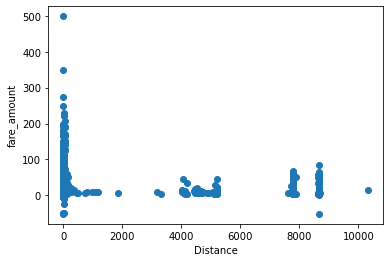

In [43]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [44]:
df.drop(df[df["Distance"]>60].index,inplace=True)
df.drop(df[df["Distance"]==0].index,inplace=True)
df.drop(df[df["Distance"]<0].index,inplace=True)

df.drop(df[df["fare_amount"]==0].index,inplace=True)
df.drop(df[df["fare_amount"]<0].index,inplace=True)

df.drop(df[df["Distance"]>100].index,inplace=True)
df.drop(df[df["fare_amount"]>100].index,inplace=True)
df.drop(df[(df['fare_amount']>100)&(df['Distance']<1)].index,inplace=True)



Text(0, 0.5, 'fare_amount')

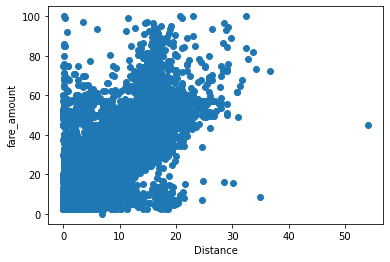

In [45]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [46]:
x=df['Distance'].values.reshape(-1,1)
y=df['fare_amount'].values.reshape(-1,1)
std=StandardScaler()
Y=std.fit_transform(y)
X=std.fit_transform(x)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [47]:
def apply_model(model):
    model.fit(X_train,Y_train)
    print("Training Score = ",model.score(X_train,Y_train))
    print("Testing Score = ",model.score(X_test,Y_test))
    print("Accuracy = ",model.score(X_test,Y_test))
    
    Y_pred = model.predict(X_test)
    print("predicted value: \n",Y_pred)
    print("Mean Absolute Error =",metrics.mean_absolute_error(Y_test,Y_pred))
    print("Root Mean Squared Error =", np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

In [48]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Distance             0
dtype: int64

In [49]:
df.dropna(axis=0,inplace=True)

In [50]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Distance             0
dtype: int64

In [51]:
lr = LinearRegression()
apply_model(lr)

Training Score =  0.7866849899354956
Testing Score =  0.7830260925855166
Accuracy =  0.7830260925855166
predicted value: 
 [[-0.82096278]
 [ 0.03065173]
 [-0.60205247]
 ...
 [-0.63141848]
 [-0.273687  ]
 [-0.55666862]]
Mean Absolute Error = 0.2545501802202159
Root Mean Squared Error = 0.4602553198169547


In [52]:
rf=RandomForestRegressor(n_estimators=100,random_state=10)
apply_model(rf)

C:\Users\sunny\AppData\Local\Temp\ipykernel_55232\3173620046.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


Training Score =  0.8093627920084597
Testing Score =  0.7820016866506112
Accuracy =  0.7820016866506112
predicted value: 
 [-0.2260287  -0.0407427  -0.59278389 ... -0.63773091 -0.29214364
 -0.55010141]
Mean Absolute Error = 0.2556935103877707
Root Mean Squared Error = 0.46134054956522225
